In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from DQN import DQN

In [20]:
def plot_mean_return_errorbar(setting_list, num_runs_per_setting, num_episodes, n_sigma=1, savefig=False):
    plt.figure(figsize=(6, 6), dpi=150)
    big_G = np.zeros((num_runs_per_setting, num_episodes))
    for i in range(num_runs_per_setting):
        self = setting_list[i]
        plt.plot(self.episode_list[:-1], self.G, 'C0.', ms=3, alpha=0.1)
        big_G[i, :] = self.G
    # plot mean return and shaded error bar
    mean = np.mean(big_G, axis=0)
    std = np.std(big_G, axis=0)
    plt.plot(self.episode_list[:-1], mean, c='C1', label='Mean Return')
    plt.fill_between(self.episode_list[:-1], mean - n_sigma * std, mean + n_sigma * std, color='C1', alpha=0.1, label=fr'{n_sigma}-$\sigma$ Error')
    plt.xlabel('Episode #')
    plt.ylabel('Return')
    plt.legend()
    plt.title('Return vs. Episode #')
    plt.yscale('symlog')
    if savefig:
        plt.savefig(f'./figures/{self.save_dir}/mean_return_{self.num_episodes}_{self.target_update}.png', dpi=300, bbox_inches='tight')
    plt.show()
    return None

def plot_ablation_study(yes_target_yes_replay, yes_target_no_replay, no_target_yes_replay, no_target_no_replay, num_runs_per_setting, num_episodes, n_sigma=1, savefig=False):
    plt.figure(figsize=(6, 6), dpi=150)
    big_G = np.zeros((num_runs_per_setting, num_episodes))
    for i in range(num_runs_per_setting):
        self = yes_target_yes_replay[i]
        big_G[i, :] = self.G
    mean = np.mean(big_G, axis=0)
    std = np.std(big_G, axis=0)
    plt.plot(self.episode_list[:-1], mean, c='C0', label='Yes Target, Yes Replay')
    plt.fill_between(self.episode_list[:-1], mean - n_sigma * std, mean + n_sigma * std, color='C0', alpha=0.1)
    big_G = np.zeros((num_runs_per_setting, num_episodes))
    for i in range(num_runs_per_setting):
        self = yes_target_no_replay[i]
        big_G[i, :] = self.G
    mean = np.mean(big_G, axis=0)
    std = np.std(big_G, axis=0)
    plt.plot(self.episode_list[:-1], mean, c='C1', label='Yes Target, No Replay')
    plt.fill_between(self.episode_list[:-1], mean - n_sigma * std, mean + n_sigma * std, color='C1', alpha=0.1)
    big_G = np.zeros((num_runs_per_setting, num_episodes))
    for i in range(num_runs_per_setting):
        self = no_target_yes_replay[i]
        big_G[i, :] = self.G
    mean = np.mean(big_G, axis=0)
    std = np.std(big_G, axis=0)
    plt.plot(self.episode_list[:-1], mean, c='C2', label='No Target, Yes Replay')
    plt.fill_between(self.episode_list[:-1], mean - n_sigma * std, mean + n_sigma * std, color='C2', alpha=0.1)
    big_G = np.zeros((num_runs_per_setting, num_episodes))
    for i in range(num_runs_per_setting):
        self = no_target_no_replay[i]
        big_G[i, :] = self.G
    mean = np.mean(big_G, axis=0)
    std = np.std(big_G, axis=0)
    plt.plot(self.episode_list[:-1], mean, c='C3', label='No Target, No Replay')
    plt.fill_between(self.episode_list[:-1], mean - n_sigma * std, mean + n_sigma * std, color='C3', alpha=0.1)
    plt.xlabel('Episode #')
    plt.ylabel('Return')
    plt.legend()
    plt.title('Ablation Study')
    plt.yscale('symlog')
    if savefig:
        plt.savefig('./figures/results/mean_return_ablation_study.png', dpi=300, bbox_inches='tight')
    plt.show()
    return None

In [3]:
savefig = True
n_sigma = 1
num_runs_per_setting = 10
num_episodes_per_run = 150

verbose = False
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.1
learning_rate = 0.00025
batch_size = 32
replay_size = 100000
init_replay_size = 500
target_update = 1000
savefig_per_setting = False

### Yes target, yes replay

In [4]:
start = time.time()
target_Q = True
replay = True
yes_target_yes_replay = []
for _ in range(num_runs_per_setting):
    dqn_yes_target_yes_replay = DQN(gamma, epsilon, epsilon_min, learning_rate, batch_size, replay_size, init_replay_size, target_update, savefig_per_setting, target_Q, replay, verbose)
    dqn_yes_target_yes_replay.run(num_episodes_per_run)
    yes_target_yes_replay.append(dqn_yes_target_yes_replay)
    end = time.time()
    print(f"Run {_}: {(end - start)/60:0.3f} minutes")
end = time.time()
print(f"Time taken for {num_runs_per_setting} DQN runs with target network and replay buffer: {(end - start)/60:0.3f} minutes")


Run 0: 4.615 minutes
Run 1: 9.141 minutes
Run 2: 13.929 minutes
Run 3: 18.574 minutes
Run 4: 23.152 minutes
Run 5: 27.746 minutes
Run 6: 32.413 minutes
Run 7: 37.150 minutes
Run 8: 41.631 minutes
Run 9: 46.280 minutes
Time taken for 10 DQN runs with target network and replay buffer: 46.280 minutes


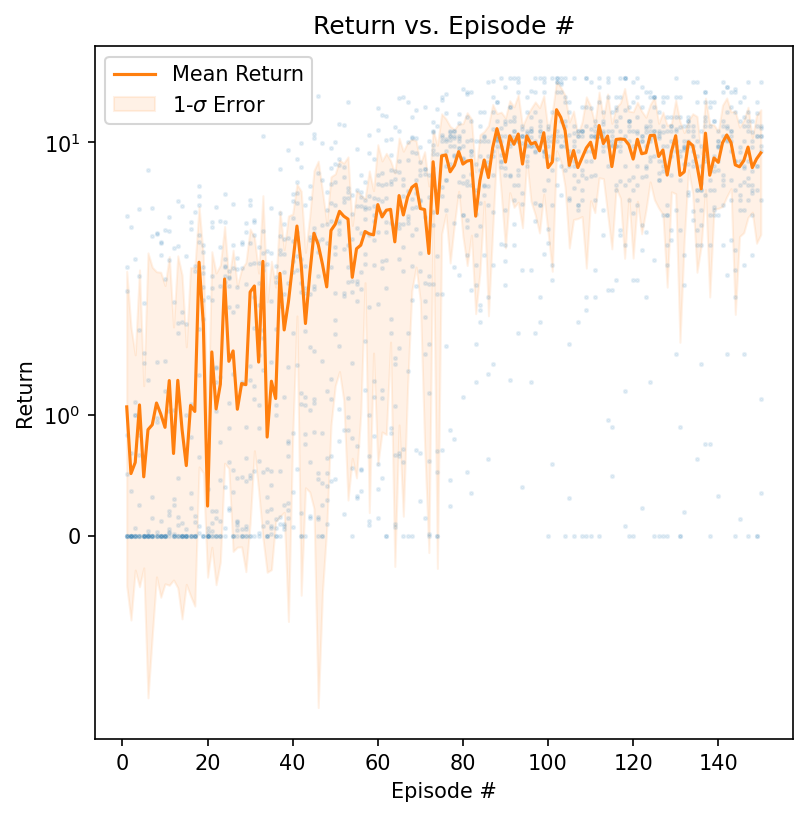

In [21]:
plot_mean_return_errorbar(yes_target_yes_replay, num_runs_per_setting, num_episodes_per_run, n_sigma, savefig)

### Yes target, no replay

In [6]:
start = time.time()
target_Q = True
replay = False
yes_target_no_replay = []
for _ in range(num_runs_per_setting):
    dqn_yes_target_no_replay = DQN(gamma, epsilon, epsilon_min, learning_rate, batch_size, replay_size, init_replay_size, target_update, savefig_per_setting, target_Q, replay, verbose)
    dqn_yes_target_no_replay.run(num_episodes_per_run)
    yes_target_no_replay.append(dqn_yes_target_no_replay)
    end = time.time()
    print(f"Run {_}: {(end - start)/60:0.3f} minutes")
end = time.time()
print(f"Time taken for {num_runs_per_setting} DQN runs with target network and no replay buffer: {(end - start)/60:0.3f} minutes")


Run 0: 4.837 minutes
Run 1: 9.821 minutes
Run 2: 15.122 minutes
Run 3: 20.425 minutes
Run 4: 26.017 minutes
Run 5: 31.395 minutes
Run 6: 36.712 minutes
Run 7: 42.158 minutes
Run 8: 47.424 minutes
Run 9: 52.742 minutes
Time taken for 10 DQN runs with target network and no replay buffer: 52.742 minutes


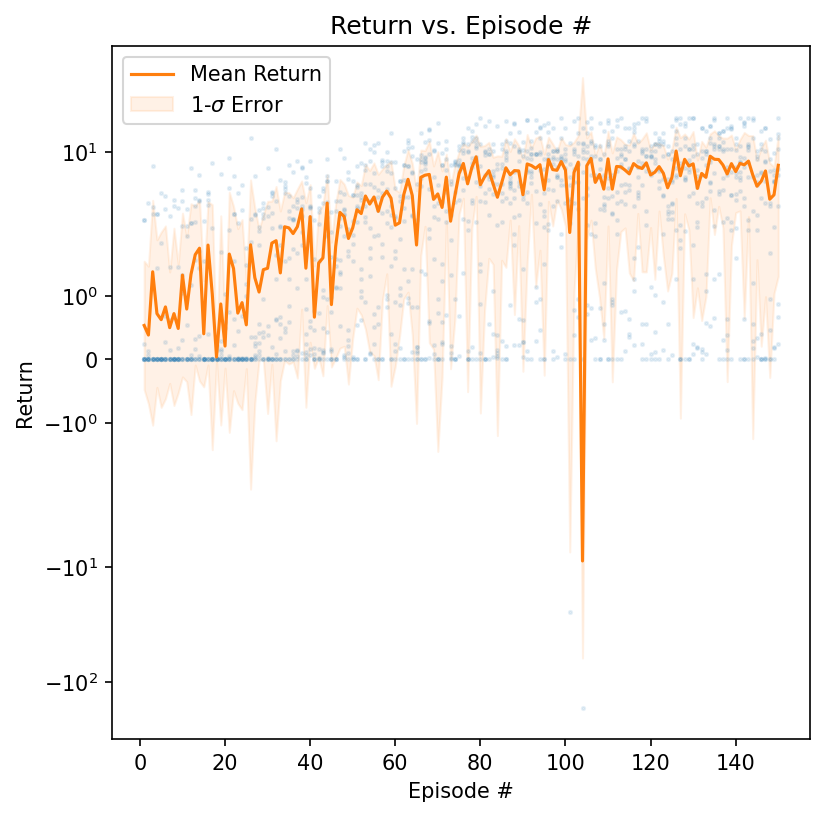

In [22]:
plot_mean_return_errorbar(yes_target_no_replay, num_runs_per_setting, num_episodes_per_run, n_sigma, savefig)

### No target, yes replay

In [8]:
start = time.time()
target_Q = False
replay = True
no_target_yes_replay = []
for _ in range(num_runs_per_setting):
    dqn_no_target_yes_replay = DQN(gamma, epsilon, epsilon_min, learning_rate, batch_size, replay_size, init_replay_size, target_update, savefig_per_setting, target_Q, replay, verbose)
    dqn_no_target_yes_replay.run(num_episodes_per_run)
    no_target_yes_replay.append(dqn_no_target_yes_replay)
    end = time.time()
    print(f"Run {_}: {(end - start)/60:0.3f} minutes")
end = time.time()
print(f"Time taken for {num_runs_per_setting} DQN runs with no target network and replay buffer: {(end - start)/60:0.3f} minutes")


Run 0: 5.495 minutes
Run 1: 10.715 minutes
Run 2: 16.046 minutes
Run 3: 21.395 minutes
Run 4: 26.747 minutes
Run 5: 32.004 minutes
Run 6: 37.399 minutes
Run 7: 42.769 minutes
Run 8: 48.030 minutes
Run 9: 53.409 minutes
Time taken for 10 DQN runs with no target network and replay buffer: 53.409 minutes


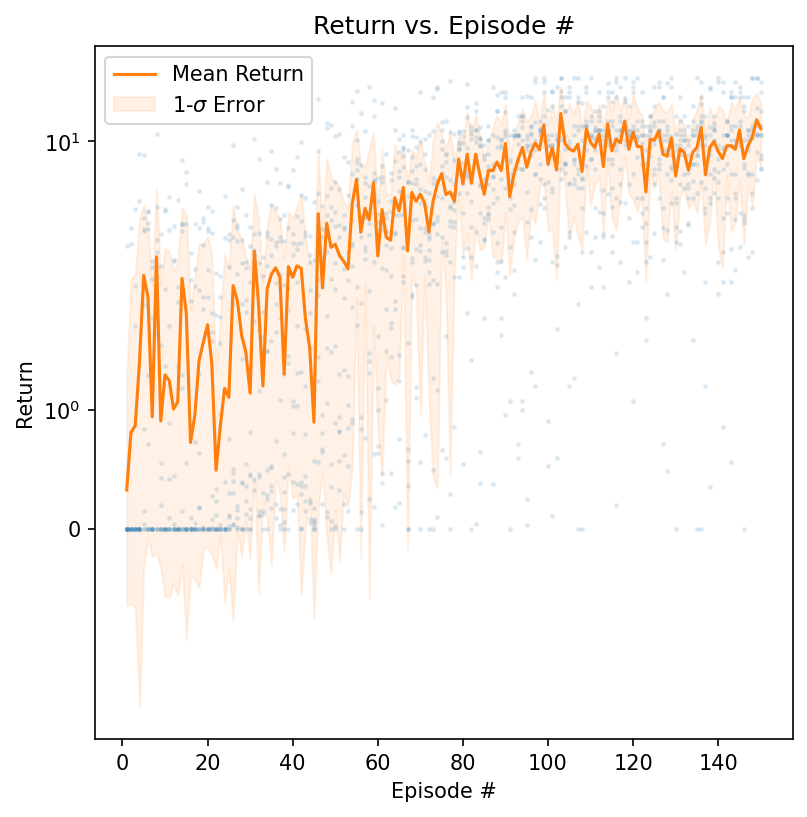

In [23]:
plot_mean_return_errorbar(no_target_yes_replay, num_runs_per_setting, num_episodes_per_run, n_sigma, savefig)

### No target, no replay

In [10]:
start = time.time()
target_Q = False
replay = False
no_target_no_replay = []
for _ in range(num_runs_per_setting):
    dqn_no_target_no_replay = DQN(gamma, epsilon, epsilon_min, learning_rate, batch_size, replay_size, init_replay_size, target_update, savefig_per_setting, target_Q, replay, verbose)
    dqn_no_target_no_replay.run(num_episodes_per_run)
    no_target_no_replay.append(dqn_no_target_no_replay)
    end = time.time()
    print(f"Run {_}: {(end - start)/60:0.3f} minutes")
end = time.time()
print(f"Time taken for {num_runs_per_setting} DQN runs with no target network and no replay buffer: {(end - start)/60:0.3f} minutes")


Run 0: 5.532 minutes
Run 1: 10.852 minutes
Run 2: 16.175 minutes
Run 3: 21.717 minutes
Run 4: 27.013 minutes
Run 5: 32.327 minutes
Run 6: 37.740 minutes
Run 7: 43.035 minutes
Run 8: 48.339 minutes
Run 9: 53.533 minutes
Time taken for 10 DQN runs with no target network and no replay buffer: 53.533 minutes


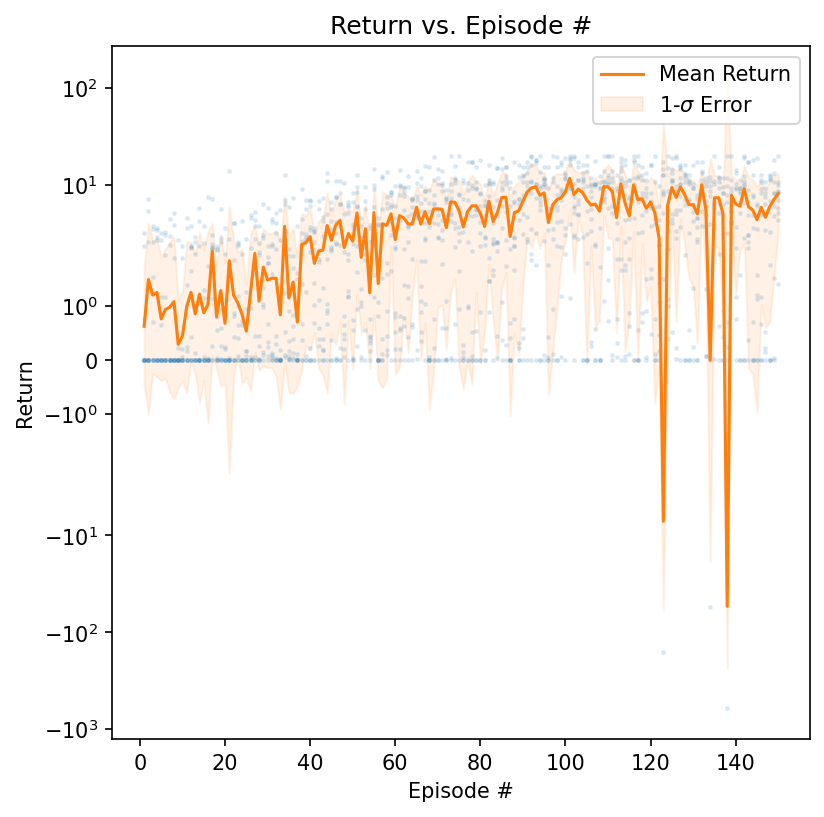

In [24]:
plot_mean_return_errorbar(no_target_no_replay, num_runs_per_setting, num_episodes_per_run, n_sigma, savefig)

### Ablation study

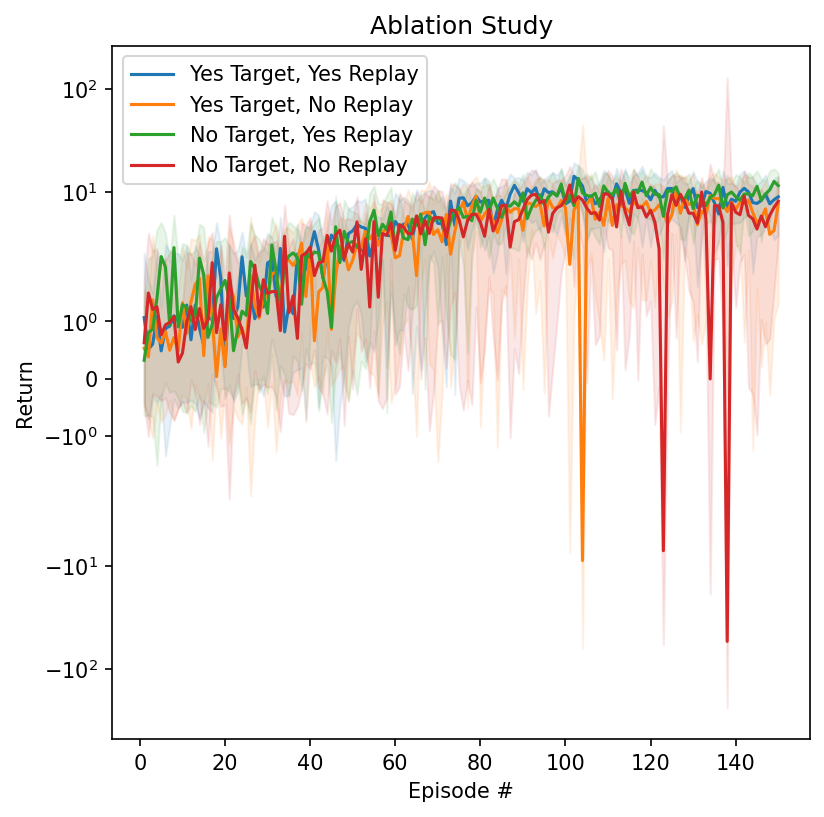

In [25]:
plot_ablation_study(yes_target_yes_replay, yes_target_no_replay, no_target_yes_replay, no_target_no_replay, num_runs_per_setting, num_episodes_per_run, n_sigma, savefig)